In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  7 17:45:19 2017

@author: matt
"""
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy
import random
#import pyvcf


# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from itertools import izip as zip, count # izip for maximum efficiency

rowCount=0
with open('/home/matt/genotype_report_080817.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if rowCount==0:
            alldata = []                                   
            colVals=row
            #find when assays start
            indexAssaystart1=row.index('C__25986767_70')
            #find when SNPs start
            indexSNPstart1=row.index('rs5030865')
            indexAssaystart2=row.index('C__26544178_30')
            indexSNPstart2=row.index('CYP2C19*10/680C>T')
            indexCNVstart=row.index('Hs04502391_cn')
        else:
            alldata.append(row)
        colCount=len(row)
        rowCount=rowCount+1
 

    #sort column values for easy comparison
labelSorted=sorted(colVals)        
diagCodes=np.zeros((rowCount,indexAssaystart1))
genoCodes=np.zeros((rowCount,len(colVals)-indexAssaystart1))
genoCodesData=np.zeros((rowCount,len(colVals)-indexAssaystart1))

# could fix and make more efficient to fill diagCodes
# diagCodes=[all(tuple) for tuple in zip(*alldata)]

#transpose list to easily access column data   
categoryData=map(list, zip(*alldata))

#get unique elements of each column
els=[]
for test in categoryData:
    els.append(set(test))

rowNum=0
for row in alldata:                    
    colNum=0
    for col in row[0:indexAssaystart1-1]:
        if col=='TRUE':
            diagCodes[rowNum,colNum]=int(col == 'TRUE')
#         if colNum==0:
#             diagCodes[rowNum,colNum]=col
        colNum=colNum+1
        
    colNum=indexAssaystart1
    for col in row[indexAssaystart1:]:
        if col=='none':
            genoCodes[rowNum,colNum-indexAssaystart1]=0
        else:
            genoCodes[rowNum,colNum-indexAssaystart1]=1
            elnum=1
            for el in els[colNum]:
                if col==el:
                    genoCodesData[rowNum,colNum-indexAssaystart1]=elnum
                    check=['UND','N/A','INV']
                    if col in check:
                        genoCodesData[rowNum,colNum-indexAssaystart1]=0
                        genoCodes[rowNum,colNum-indexAssaystart1]=0
                elnum=elnum+1

        colNum=colNum+1

    rowNum=rowNum+1

#transpose
diagCodesCat=map(list, zip(*diagCodes))
genoCodesCat=map(list, zip(*genoCodes))


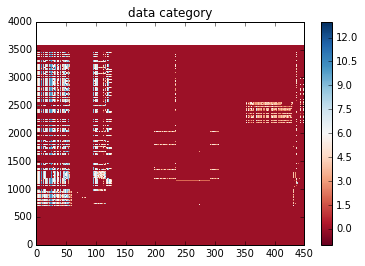

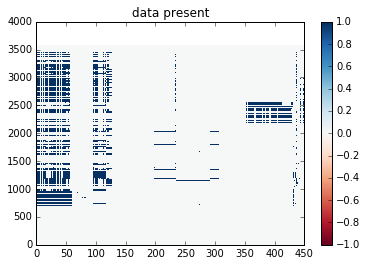

In [144]:
#plot test/patient organization
# y, x = np.mgrid[slice(-3, 3 + dy, dy),slice(-3, 3 + dx, dx)]
plt.pcolor(genoCodesCat, cmap='RdBu', vmin=-1, vmax=genoCodesCat.max())
plt.title('data category')
# set the limits of the plot to the limits of the data
# plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.show()

plt.pcolor(genoCodes, cmap='RdBu', vmin=-1, vmax=1)
plt.title('data present')
# set the limits of the plot to the limits of the data
# plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.show()

0.0
0.0


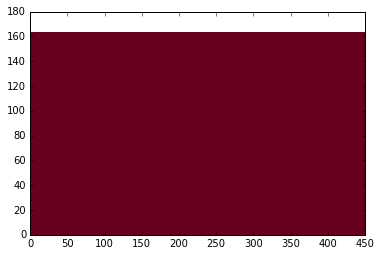

In [54]:
usedata=[genoCodesData[i] for i in usePtsover100]
print max(genoCodesData[usePtsover100[100]])
print max(usedata[100])
# genocodesdataalt=[[i[j] for j in useTestsover100] for i in usedata]
# plt.pcolor(usedata,cmap='RdBu',vmin=0,vmax=10)
# plt.show()
plt.plot(usePtsover100)

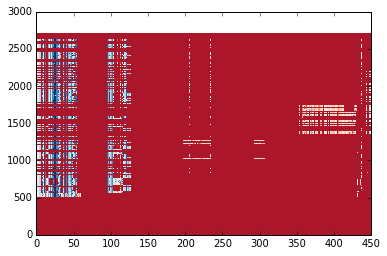

In [3]:
#looking at diagnosis codes

commonCodes=[]
commonCodeinds=np.where(sum(diagCodes)>0)[0]
commonCodeinds_sorted=sorted(range(len(commonCodeinds)), key=sum(diagCodes)[commonCodeinds].__getitem__)
for i in commonCodeinds_sorted:
    commonCodes.append(colVals[commonCodeinds[i]])

#select data with more than 100 patients diagnosed
usePtsover100=list(set(np.where(diagCodes.T>0)[1]))
# usePtsover100=list(set(np.where(diagCodes.T[commonCodeinds[commonCodeinds_sorted]]>0)[1]))
useDiagDataover100=map(list,zip(*[diagCodes.T[commonCodeinds[j]] for j in commonCodeinds_sorted]))
useDiagDataover100=[useDiagDataover100[i] for i in usePtsover100]

useGenoCodesDataover100=[genoCodesData[i] for i in usePtsover100]
plt.pcolor(useGenoCodesDataover100,cmap='RdBu',vmin=-1,vmax=10)
plt.show()

len(useDiagDataover100)
iInd=0
useGenoCodesover100=[genoCodesData[i] for i in usePtsover100]

for i in useGenoCodesover100:
    jInd=0
    for j in i:
        if j!=0:
            useGenoCodesover100[iInd][jInd]=1
        jInd=jInd+1
    iInd=iInd+1
    
#threshold which tests were run on set of patients with most common diagnoses
#making minimum connected set 
useTestsover100=np.where([i>40 for i in sum(useGenoCodesover100)])[0]
numTestsperPt=[]
#patients with any tests run
for pt in useGenoCodesover100:
    numTestsperPt.append(sum(pt))
usePts=np.where(numTestsperPt)[0]
useGenoSet=[i[useTestsover100] for i in [useGenoCodesDataover100[j] for j in usePts]]
useDiagDataover100=[useDiagDataover100[i] for i in usePts]


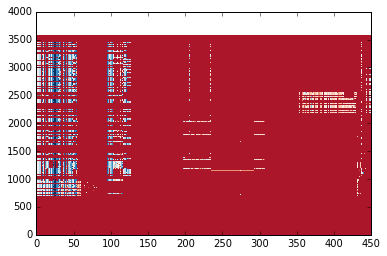

In [50]:
plt.pcolor(useGenoCodesDataover100,cmap='RdBu',vmin=-1,vmax=10)
plt.show()

IndexError: list index out of range

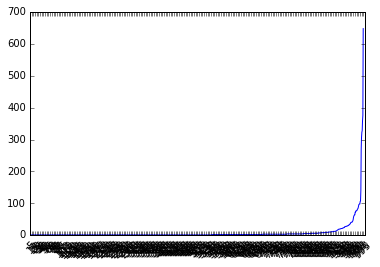

In [51]:
len(useDiagDataover100)
iInd=0
useGenoCodesover100=[genoCodesData[i] for i in usePtsover100]

for i in useGenoCodesover100:
    jInd=0
    for j in i:
        if j!=0:
            useGenoCodesover100[iInd][jInd]=1
        jInd=jInd+1
    iInd=iInd+1
drugCodes=[colVals.index('T50.905A'),colVals.index('Z79.899'),colVals.index('F11.20'),colVals.index('F13.20'),
           colVals.index('F15.20')]
chromAbnormalityCode=colVals.index('Z13.79')
healthCodes=[colVals.index('E11.9'),colVals.index('I10')]
STDCodes=[colVals.index('B37.3'),colVals.index('N76.0'),colVals.index('A59.00'),colVals.index('Z11.3')]
unkCodes=[colVals.index('')]

drugICDs=[colVals[i] for i in drugCodes]
chromICDs=colVals[chromAbnormalityCode]
STDICDs=[colVals[i] for i in STDCodes]
healthICDs=[colVals[i] for i in healthCodes]
unkICDs=[colVals[i] for i in unkCodes]
#in reverse order with >50 diagnoses, so last is most common
commonDiags=['Radiculopathy','Vitamin D deficiency','Hypercholesterolemia','Anxiety disorder','Fatigue','Low back pain',
             'Hyperlipidemia','Depressive disorder episode','Cocaine abuse','Long term opioid use',
             'Opioid abuse with intoxication','Alcohol abuse','Hyperlipidemia','Hypothyroidism','Opioid abuse',
             'Esophageal reflux','Stimulant dependence','Diabetes','Anxiety','Chromosomal anomaly','Trichomoniasis',
             'Sedative dependence','Opioid dependence','','Candidiasis','STD screening','Hypertension',
             'Vaginitis','Long-term drug therapy','Adverse effect of drugs or medication']
groupNames=['pain/opioid','std','psychiatric','alcohol','stimulant/cocaine','weight-related','back pain','other']

diagGroups=[6,7,5,2,7,6,5,2,4,0,0,3,5,5,0,7,4,5,2,7,1,0,0,7,1,1,5,1,0,0]
diagDict={'Diagnosis':commonDiags,'Code':commonCodes,'Group': diagGroups,'GroupNames': groupNames}
len(diagDict['Group'])

fig, ax = plt.subplots()
plt.plot(range(1,len(commonCodeinds)+1),sum(diagCodes[1:])[commonCodeinds[commonCodeinds_sorted]])
plt.xticks(range(5,len(commonCodeinds)+1,5))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_xticklabels([commonDiags[i-1] for i in range(5,len(commonCodeinds)+1,5)])

plt.title('number of patients per diagnosis')
plt.show()
plt.savefig("test.eps", format="eps")
#categorize each patient by its group name


1273
[ 2  4  5  8 11]


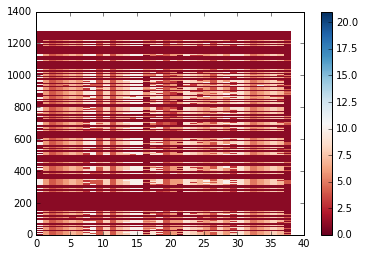

In [25]:
#find pts with chromosomal abnormality diagnosis
chromPts=np.where(diagCodesCat[chromAbnormalityCode])[0]
#hist of how many patients had which number of tests done
counts, x, y=plt.hist(sum(genoCodes[sepPts]),range(0,100))
plt.close()

#take the number of patients that had the maximum number of tests done
numPtsSepwTests=np.where(counts[1:]==max(counts[1:]))[0]+1

#which tests to use
useGenoTestsChrom=np.where(sum(genoCodes[chromPts])==numPtsChromwTests)[0]

ptnum=0;
pttests=[genoCodesCat[i] for i in useGenoTestsChrom]
pttests=map(list, zip(*pttests))
pttests_total=[sum(i) for i in pttests]
#use patients of any diagnosis that have those tests done
usePts=np.where([i==len(useGenoTestsChrom) for i in pttests_total])[0]

#diagnosis 1/0 for chromosomal abnormality
diagsChrom=[i[chromAbnormalityCode] for i in diagCodes[usePts]]

useDataChrom=[]
for pt in usePts:
    tmp=genoCodesData[pt]
    templist=tmp[useGenoTestsChrom]
    useDataChrom.append(templist)
    ptnum=ptnum+1
       
print len(useDataChrom)
# genoCodes[np.where(genoCodes[usePtsChrom]
featurenames=[colVals[i] for i in useGenoTestsChrom+indexAssaystart1]

#index of test for chromosomal abnormality
chrom3Ind=featurenames.index('C__32407229_60')

#find indices of possible test results that indicate trisomy
inds3x=np.where([i[0:3] in ['CTT','TCT'] for i in els[colVals.index('C__32407229_60')]])[0]
dataind=0
print inds3x
#replace indices with 3 xsomes with -1 to clearly delineate
for i in useDataChrom:
    ialt=i
    if i[chrom3Ind] in inds3x:
        ialt[chrom3Ind]=20
    useDataChrom[dataind]=ialt
    dataind=dataind+1
plt.pcolor(useDataChrom,cmap='RdBu', vmin=0, vmax=21)
plt.colorbar()
           
plt.show()


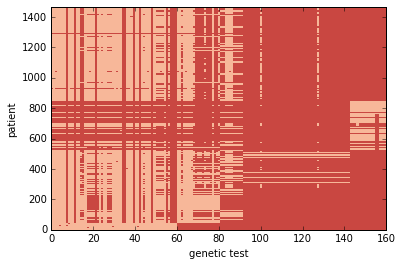

In [29]:
plt.pcolor(useGenoSet,cmap='RdBu',vmin=-1,vmax=5)
plt.xlabel('genetic test')
plt.ylabel('patient')
plt.axis([0, 160, 0, len(usePts)])
plt.show()


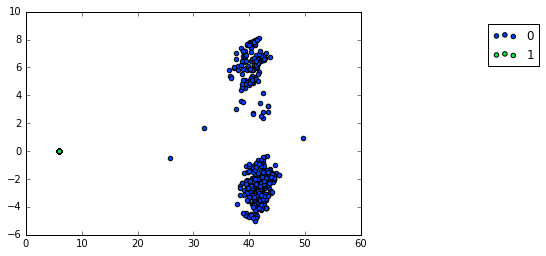

In [26]:
#try truncated SVD on chromosomal data
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

X=useDataChrom

X_pca = TruncatedSVD(n_components=3).fit_transform(X)

palette = np.array(sns.color_palette('bright',2))
fig_pca = plt.figure(figsize=(8,8))

fig = plt.figure()
ax = plt.subplot()#(aspect='equal')
#for 3d
# ax = fig.add_subplot(111, projection='3d')
labels=['0','1']
for i in range(2):
    ptInds=np.where([pt==i for pt in diagsChrom])
    
    xdata = X_pca[ptInds,0]
    ydata = X_pca[ptInds,1]
    zdata = X_pca[ptInds,2]

    c_select = palette[i]
    #for 2d
    ax.scatter(xdata,ydata,c=c_select,label=labels[i])

    #for 3d
#     ax.scatter(xdata,ydata,zdata,c=c_select,label=labels[i])

ax.legend(bbox_to_anchor=(1.55, 0.97))
plt.show()


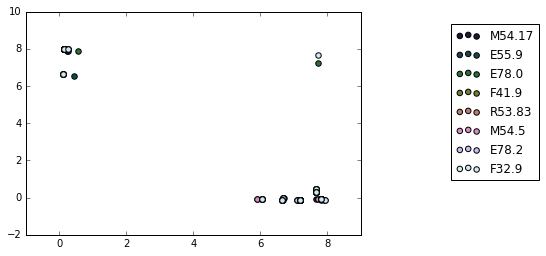

In [61]:
#try truncated SVD
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

X=useGenoSet

X_svd = TruncatedSVD(n_components=2).fit_transform(X)

palette = np.array(sns.color_palette('cubehelix',len(groupNames)))
fig_pca = plt.figure(figsize=(8,8))

fig = plt.figure()

ax = plt.subplot()#(aspect='equal')
#for 3d
# ax = fig.add_subplot(111, projection='3d')

for i in range(len(groupNames)):
    ptInds=np.where(map(list,zip(*useDiagDataover100))[i])[0]
    xdata = X_svd[ptInds,0]
    ydata = X_svd[ptInds,1]
#     zdata = X_svd[ptInds,2]

    c_select = palette[i]
    #for 2d
    ax.scatter(xdata,ydata,c=c_select, s=30,label=commonCodes[i])
    #for 3d
    #ax.scatter(xdata,ydata,zdata,c=c_select,label=labels[i])

ax.legend(bbox_to_anchor=(1.55, 0.97))
plt.show()

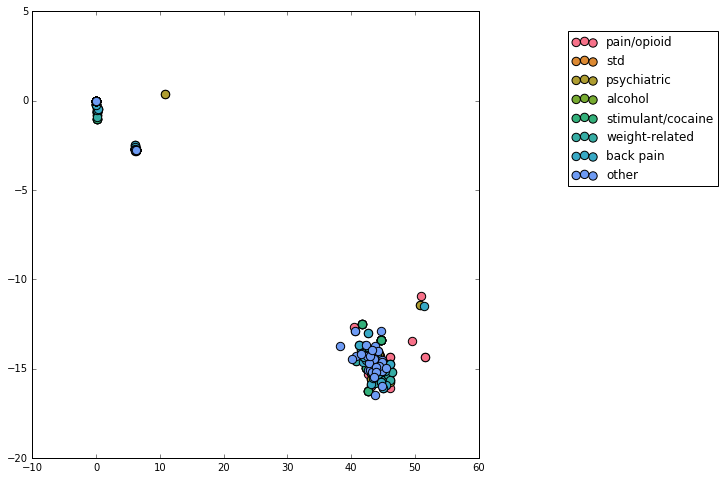

In [80]:
#try truncated SVD on whether there's data or not 
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

X=genoCodesData

X_pca = TruncatedSVD(n_components=3).fit_transform(X)

palette = np.array(sns.color_palette('husl',len(groupNames)+2))
fig_pca = plt.figure(figsize=(8,8))

ax = plt.subplot()#(aspect='equal')

for groupInd in range(len(groupNames)):
    diagInds=np.where([i==groupInd for i in diagGroups])
    ptInds=[]
    for diagInd in diagInds[0]:
        ptInds.extend(np.where(map(list,zip(*useDiagDataover100))[diagInd])[0])
    xdata = X_pca[ptInds,0]
    ydata = X_pca[ptInds,1]
    c_select = palette[groupInd]
    ax.scatter(xdata,ydata,c=c_select,s=70,label=groupNames[groupInd])

ax.legend(bbox_to_anchor=(1.55, 0.97))
plt.show()

[]

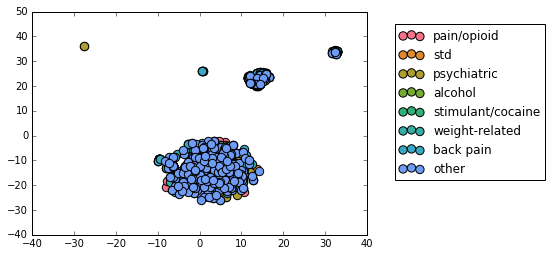

In [81]:
#try TSNE 
import pickle
from sklearn.manifold import TSNE

X=useGenoSet


X_tsne = TSNE(metric='euclidean',n_components=2).fit_transform(X)

with open('top_10_tsne.pkl','wb') as fid1:
    pickle.dump(X_tsne,fid1)

palette = np.array(sns.color_palette('husl',len(groupNames)+2))
fig_lle = plt.figure(figsize=(10,10))

fig = plt.figure()
ax = plt.subplot()#(aspect='equal')

for groupInd in range(len(groupNames)):
    diagInds=np.where([i==groupInd for i in diagGroups])
    ptInds=[]
    for diagInd in diagInds[0]:
        ptInds.extend(np.where(map(list,zip(*useDiagDataover100))[diagInd])[0])
    xdata = X_tsne[ptInds,0]
    ydata = X_tsne[ptInds,1]
    c_select = palette[groupInd]
    ax.scatter(xdata,ydata,c=c_select,s=70,label=groupNames[groupInd])
ax.legend(bbox_to_anchor=(1.55, 0.97))
plt.show()




In [60]:
#try TSNE to simply categorize whether there's data or not

import pickle
from sklearn.manifold import TSNE
X=useGenoCodesover100


X_tsne = TSNE(metric='euclidean',n_components=2).fit_transform(X)

with open('top_10_tsne.pkl','wb') as fid1:
    pickle.dump(X_tsne,fid1)
    
palette = np.array(sns.color_palette('bright',10))
fig_lle = plt.figure(figsize=(10,10))

ax = plt.subplot()#(aspect='equal')
for i in range(len(commonCodes)):
    ptInds=np.where(map(list,zip(*useDiagDataover100))[i])[0]
    xdata = X_tsne[ptInds,0]
    ydata = X_tsne[ptInds,1]
    c_select = palette[i]
    ax.scatter(xdata,ydata,c=c_select,label=commonCodes[i])

ax.legend(bbox_to_anchor=(1.55, 0.97))
plt.show()




450


NameError: name 'bork' is not defined

In [3]:
#list of geno tests
#1:128 1111:1239 - assays, multiple responses
#139:197 1240-1308 - allele/none
#197:235 more assays 
#235:273 SNPs 1346-
#274 1385: something different. col title '',  results {'1.2', '1.71', '2.11', '2.15', '2.74', 'SRB71', 'none'}
#275:292 more SNPs to 1403
#293:308 15 more assays
#bunch more allele/none
#another chunk of assays
#last 19: CNVs    

# allele=[];
# for i in alldata:
#     allele.append(i[-19])
# print allele

# #groupings found in thermofisher pharmacogenomics guide 

# # 3 versions of same info?
# print els[colVals.index('CYP2C19*2/681G>A')]
# print els[colVals.index('rs4244285')]
# print els[colVals.index('C__25986767_70')]

# #are these different tests? is data same?
# print els[colVals.index('CYP2C19*10/680C>T')]
# print els[colVals.index('CYP2C19*10/c.680C>T')]
# print els[colVals.index('rs6413438')]
# print els[colVals.index('C__30634128_10')]

# #are these different tests? same data?
# print els[colVals.index('CYP2C19*17/-806C>T')]
# print els[colVals.index('CYP2C19*17/g.-806C>T')]

# print els[colVals.index('C_11711720D_40')]
# print els[colVals.index('C_11711720C_30')]

# print els[colVals.index('C__25625804_10')]
# print els[colVals.index('C_25625804D_20')]

# print els[colVals.index('rs5030865')]
# print els[colVals.index('C_30634117C_K0')]
# print els[colVals.index('C_30634117D_M0')]



In [3]:
#which patients have different geno tests?
dataPresent= np.where(genoCodesData[:]>0)
#the ones that have any tests done
usegenoPts=set(dataPresent[0])
#the tests that have any patient data
usegenoCodes=set(dataPresent[1])
usegenoCodes=[val for val in usegenoCodes]

#which patients have diagnoses?
dataPresent= np.where(diagCodes[:]==1)
#the ones that have any diagnoses
usediagPts=set(dataPresent[0])
#the diagnoses that have any patients
usediagCodes=set(dataPresent[1])
usediagCodes=[val for val in usediagCodes]

#overlap between patients that have both any geno testing and any diagnosis 
overlapPts = [val for val in usegenoPts if val in usediagPts]

# #last patient in this overlap set seems to have most tests done
# lastPt=overlapPts[len(overlapPts)-1]
# inds=np.where(genoCodes[lastPt])
# usegenoCodes_most=[val for val in inds[0]]
# usegenoCodes_most=usegenoCodes[]

useRows=overlapPts
data=genoCodes

#slow for large data >1000 of rows*cols
# set the limits of the plot to the limits of the data

# y, x = np.mgrid[0:len(useRows),0:len(usegenoCodes)]
#how many patients per genotest?
histTestsperPatient=sum(np.transpose(genoCodes[overlapPts]))
#how many geno tests per patient?
histPatientsperTest=sum(genoCodes[overlapPts])
testIndex=sorted(range(len(histTestsperPatient)), key=histTestsperPatient.__getitem__)

numPts=[]
for num in range(0,len(histPatientsperTest)):
    numPts.append(len(np.where(histTestsperPatient==num)[0]))

testn=0
for n in numPts:
    if n==max(numPts):
        numTestsmax=testn
    testn=testn+1
#65 tests run in 672 patients
    
print [max(numPts),'patients with',numTestsmax,'genetic tests performed']

usePt=[]
useTests=[]
ptind=0

for pt in histTestsperPatient:
    if pt==numTestsmax:
        usePt.append(overlapPts[ptind])
        testsDone=np.argwhere(genoCodes[overlapPts[ptind-1]])
        for t in testsDone:
            useTests.append(t[0])
    ptind=ptind+1
    

[666, 'patients with', 65, 'genetic tests performed']


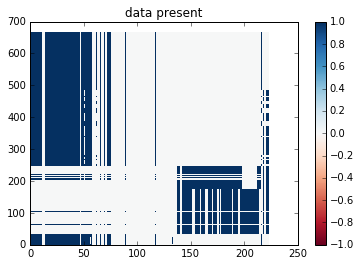

In [8]:
from helperFunctions import checkData

checkData(useTests,colVals,indexAssaystart1,genoCodes,usePt)
# useTests_unique=[]
# for i in set(useTests):
#     useTests_unique.append(i)

# useTests_names=[]
# for i in useTests_unique:
#     useTests_names.append(colVals[i+indexAssaystart1])

# genoCodes_use=[];
# for i in genoCodes[usePt]:
#     genoCodes_use.append(i[useTests_unique])
    
# plt.pcolor(genoCodes_use, cmap='RdBu', vmin=-1, vmax=1)
# plt.title('data present')
# # set the limits of the plot to the limits of the data
# # plt.axis([x.min(), x.max(), y.min(), y.max()])
# plt.colorbar()
# plt.show()



In [ ]:
#check if CYP/rs/C_ data compare as expected
concatTests = [categoryData[colVals.index('CYP2C19*2/681G>A')],categoryData[colVals.index('rs4244285')],categoryData[colVals.index('C__25986767_70')]]
concatTestsRows=map(list, zip(*concatTests))
checkPts=[];
ptNum=0;
#check in CYP test: most limited data there
for pt in concatTests[0]:
    if pt=='A/G':
        checkPts.append(concatTestsRows[ptNum])
    ptNum=ptNum+1
print checkPts
#not validated but not disproven

concatTests = [categoryData[colVals.index('CYP2C19*10/c.680C>T')],categoryData[colVals.index('rs6413438')],categoryData[colVals.index('C__30634128_10')]]
concatTestsRows=map(list, zip(*concatTests))
checkPts2=[];
ptNum=0;
for pt in concatTests[0]:
    if pt=='C/C':
        if concatTestsRows[ptNum]!=['C/C','none','none']:
#             print concatTestsRows[ptNum]
            checkPts2.append(concatTestsRows[ptNum])
    #also look at most complicated assay
    elif concatTests[2][ptNum]!='none':
        checkPts2.append(concatTestsRows[ptNum])
    ptNum=ptNum+1
#when both tested, they match

concatTests = [categoryData[colVals.index('CYP2C19*10/c.680C>T')],categoryData[colVals.index('rs6413438')],categoryData[colVals.index('C__30634128_10')]]
concatTestsRows=map(list, zip(*concatTests))
checkPts2=[];
ptNum=0;
for pt in concatTests[0]:
    if pt=='C/C':
        if concatTestsRows[ptNum]!=['C/C','none','none']:
#             print concatTestsRows[ptNum]
            checkPts2.append(concatTestsRows[ptNum])
    #also look at most complicated assay
    elif concatTests[2][ptNum]!='none':
        checkPts2.append(concatTestsRows[ptNum])
    ptNum=ptNum+1

In [308]:
#now test for drug issues

drugPts=np.where(diagCats[drugCode])[0]
counts, x, y=plt.hist(sum(genoCodes[drugPts]),range(0,100))
numPtsDrugwTests=np.where(counts[1:]==max(counts[1:]))[0]+1
useGenTestsDrug=np.where(sum(genoCodes[drugPts])==numPtsDrugwTests)[0]
usePtsDrug=np.where(sum(genoCodesData)[useGenTestsDrug]==len(useGenTestsDrug))


96.0

0.150715035389
0.0734467410682
1273
255


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

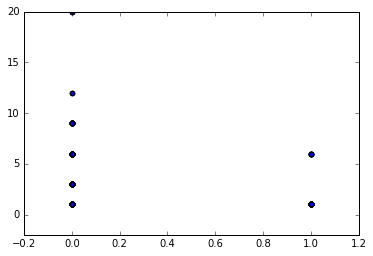

In [29]:
#random forest
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
 
rf = RandomForestRegressor()
trainfrac=8
nSamps=len(useDataChrom)
randsamps=random.sample(range(0,nSamps+1),nSamps)
trainsamps=[randsamps[n] for n in range(0,nSamps*trainfrac//10)]
trainData=[useDataChrom[i-1] for i in trainsamps]
catTrainData=[diagsChrom[i-1] for i in trainsamps]

rf.fit(trainData,catTrainData)

testsamps=[randsamps[n] for n in range(nSamps*trainfrac//10,nSamps)]
testData=[useDataChrom[i-1] for i in testsamps]
catTestData=[diagsChrom[i-1] for i in testsamps]
allpreds=[]
pred1=[]
pred0=[]
for n in range(0,len(testsamps)):
    instances = testData[n].reshape(1, -1)
    if catTestData[n]==1:
        pred1.append(rf.predict(instances)) 
    else:
        pred0.append(rf.predict(instances))
    allpreds.append(rf.predict(instances))
print np.mean(pred1)
print np.mean(pred0)

plt.scatter(diagsChrom,map(list, zip(*useDataChrom))[chrom3Ind])
set(map(list, zip(*useDataChrom))[chrom3Ind])
plt.axis([-0.2,1.2,-2,20])

from scipy.stats.stats import pearsonr
# print len(diagsChrom)
# print len(allpreds)
# pearsonr(diagsChrom,allpreds)

In [25]:
# check with treeinterpreter how random forest is doing
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

rf = RandomForestRegressor()
boston = load_boston()
instances=boston.data[[300, 309]]
prediction, bias, contributions = ti.predict(rf, instances)   
for i in range(len(instances)):
    print "Instance", i
    print "Bias (trainset mean)", bias[i]
    print "Feature contributions:"
    for c, feature in sorted(zip(contributions[i], featurenames), key=lambda x: -abs(x[0])):
        print feature, round(c, 2)
        print "-"*20 

AttributeError: 'RandomForestRegressor' object has no attribute 'n_outputs_'

In [24]:
len(boston.data[0])

13

C=100.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.9234
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9234
C=1.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.9234
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9234
C=0.01
Sparsity with L1 penalty: 81.58%
score with L1 penalty: 0.9234
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9234


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

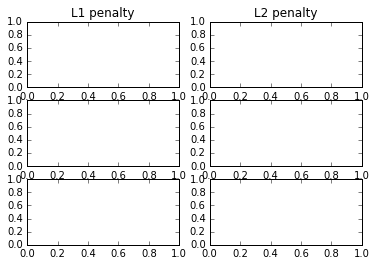

In [88]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
nSamps=len(useDataChrom)
trainfrac=8

# digits = datasets.load_digits()

randsamps=random.sample(range(0,nSamps+1),nSamps)
trainsamps=[randsamps[n] for n in range(0,nSamps*trainfrac//10)]
trainData=[useDataChrom[i-1] for i in trainsamps]
randsamps=random.sample(range(0,nSamps+1),nSamps)
trainsamps=[randsamps[n] for n in range(0,nSamps*trainfrac//10)]
catTrainData=[diagsChrom[i-1] for i in trainsamps]

X, y = trainData, catTrainData
# X = StandardScaler().fit_transform(X)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.9)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.9)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

        
#     l1_plot.imshow(np.abs(coef_l1_LR), interpolation='nearest',
#                    cmap='binary', vmax=1, vmin=0)
#     l2_plot.imshow(np.abs(coef_l2_LR), interpolation='nearest',
#                    cmap='binary', vmax=1, vmin=0)
#     plt.text(-8, 3, "C = %.2f" % C)

#     l1_plot.set_xticks(())
#     l1_plot.set_yticks(())
#     l2_plot.set_xticks(())
#     l2_plot.set_yticks(())

# plt.show()

# from sklearn.linear_model import LogisticRegression
# LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
#                    class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, 
#                    warm_start=False, n_jobs=1)